# Задача 2
### Пешков Максим

In [1]:
a1 = 17
a2 = 6
a3 = 26
b1 = 14
b2 = 1
b3 = 12
c1 = 32
c2 = 18
c3 = 30

In [2]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt
import math

## Попытка что-то сделать с моими личными параметрами

In [3]:
# Инициализируем модель
m = GEKKO(remote=False)
nt = 101
m.time = np.linspace(0,2,nt)

# Задаём переменные
y = m.Var(value=a1)
z = m.Var(value=0)
u = m.Var(value=0,lb=-c1,ub=c2) #граничные условия на управление
t = m.Var(value=0)

# Отмечаем последнюю точку
p = np.zeros(nt)    
p[-1] = 1.0
final = m.Param(value=p)


# Задаём уравнения
m.Equation(y.dt() == a3*y + u)
m.Equation(t.dt() == 1)
m.Equation(z.dt() == b1*y - b2*u)

m.Obj(z * final)    # Целевая функция
m.options.IMODE = 6 # 6 -- задача оптимального управления/динамического программирования
m.solve(disp=False)


# Рисуем получившееся решение
plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:],u.value[1:],'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

Exception: @error: Solution Not Found


### При этом если поменять параметры, то все будет работать (например, вместо a3=26, поставить 0.5), что разрешено из сообщения в канале 

## Нахождение экстремума

### Нахождение минимума

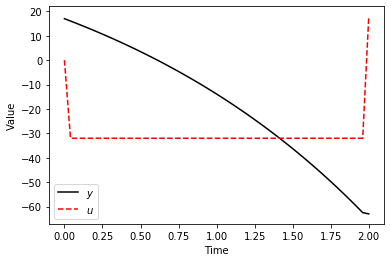

In [31]:
# Инициализируем модель
m = GEKKO(remote=False)
nt = 51
m.time = np.linspace(0,2,nt)

# Задаём переменные
y = m.Var(value=a1)
z = m.Var(value=0)
u = m.Var(value=0,lb=-c1,ub=c2) #граничные условия на управление
t = m.Var(value=0)
p = np.zeros(nt)    # Отмечаем последнюю точку
p[-1] = 1.0
final = m.Param(value=p)


# Задаём уравнения
m.Equation(y.dt() == 0.5*y + u) 
m.Equation(t.dt() == 1)
m.Equation(z.dt() == b1*y - b2*u)

m.Minimize(z * final)    # Целевая функция
m.options.IMODE = 6 # 6 -- задача оптимального управления/динамического программирования
m.solve(disp=False)


# Рисуем получившееся решение
plt.plot(m.time, y.value, 'k-', label=r'$y$')
plt.plot(m.time,u.value,'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [32]:
print("Значения функционала в минимуме: {}".format(m.options.OBJFCNVAL))

Значения функционала в минимуме: -442.55722992


### Нахождение максимума

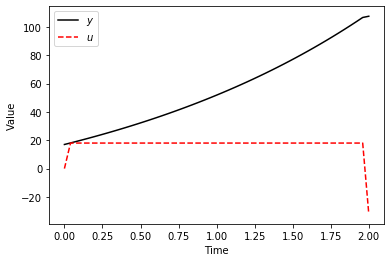

In [38]:
# Инициализируем модель
m = GEKKO(remote=False)
nt = 51
m.time = np.linspace(0,2,nt)

# Задаём переменные
y = m.Var(value=a1)
z = m.Var(value=0)
u = m.Var(value=0,lb=-c1,ub=c2) #граничные условия на управление
t = m.Var(value=0)
p = np.zeros(nt)    # Отмечаем последнюю точку
p[-1] = 1.0
final = m.Param(value=p)


# Задаём уравнения
m.Equation(y.dt() == 0.5*y + u) 
m.Equation(t.dt() == 1)
m.Equation(z.dt() == b1*y - b2*u)

m.Obj(-z * final)    # Целевая функция
m.options.IMODE = 6 # 6 -- задача оптимального управления/динамического программирования
m.solve(disp=False)


# Рисуем получившееся решение
plt.plot(m.time, y.value, 'k-', label=r'$y$')
plt.plot(m.time,u.value,'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [41]:
print("Значения функционала в максимуме: {}".format(-m.options.OBJFCNVAL))

Значения функционала в максимуме: 1547.8806342
